# Задание 1
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn..
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

In [26]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Поскольку load_boston не поддерживается в новой версии sklearn, загрузим схожий датасет fetch_california_housing

california = fetch_california_housing()
data = california['data']

X = pd.DataFrame(data, columns=california['feature_names'])
y = pd.DataFrame(california['target'], columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)
R1 = lr.predict(X_test)


# Задание 2
Создайте модель под названием model с помощью класса RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators = 1000, max_depth = 12, random_state = 42)
model.fit(X_train, y_train.values[:, 0])
R2 = model.predict(X_test)

R1_mse = mean_squared_error(R1, y_test)
R2_mse = mean_squared_error(R2, y_test)

print(R1_mse, R2_mse)

#В данном случае модель основанная на RandomForestRegressor погазала наилучший результат

0.5305677824766749 0.26971891519368185


# *Задание 3
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

<BarContainer object of 8 artists>

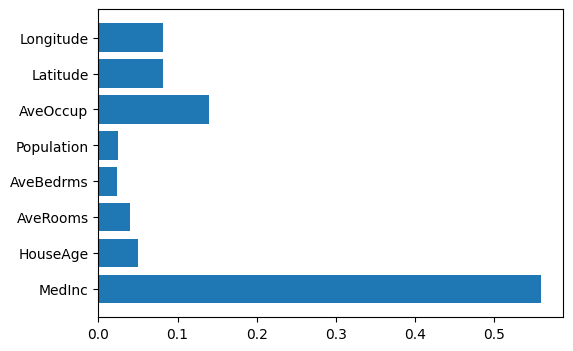

In [42]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline
# help(RandomForestRegressor)

plt.barh(california['feature_names'], model.feature_importances_)
#Судя по графику, наиболее важными признаками являются Medinc и AveOccup